In [ ]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
datasets=load_dataset('lukebarousse/data_jobs')
df=datasets['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list:ast.literal_eval(skill_list)
                                        if pd.notna(skill_list) else skill_list
                                        )

c:\Users\shabi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


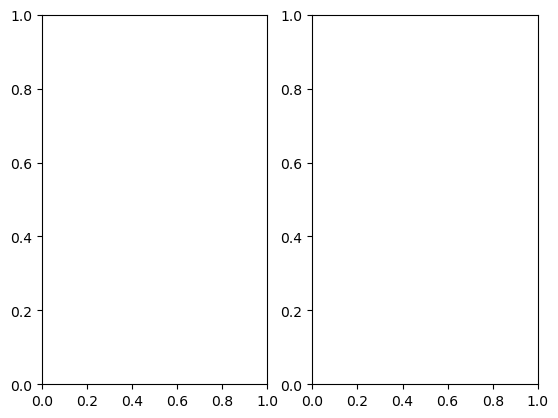

In [ ]:
fig,ax=plt.subplots(1,2)


<Axes: xlabel='job_title_short'>

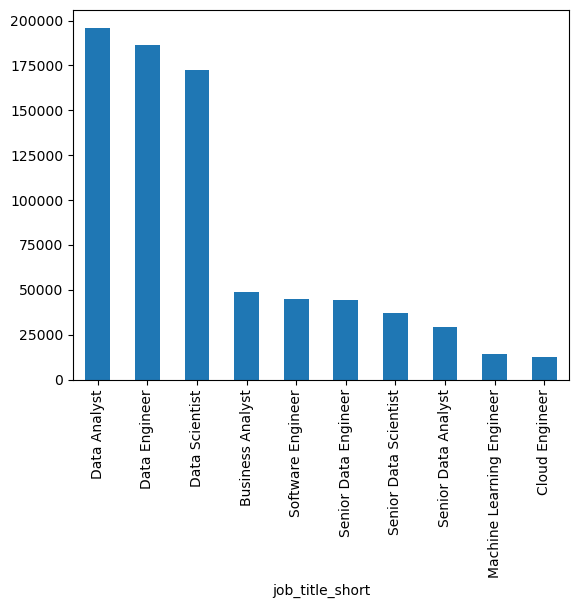

In [ ]:
fig,ax=plt.subplots()
df['job_title_short'].value_counts().plot(kind='bar',ax=ax)

In [ ]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

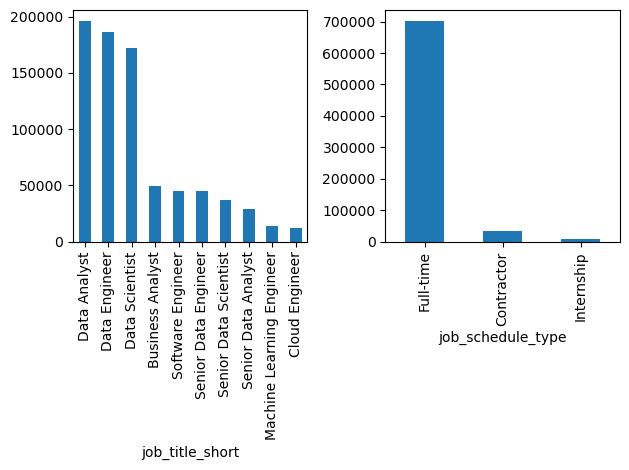

In [ ]:
fig,ax=plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar',ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])
fig.tight_layout()


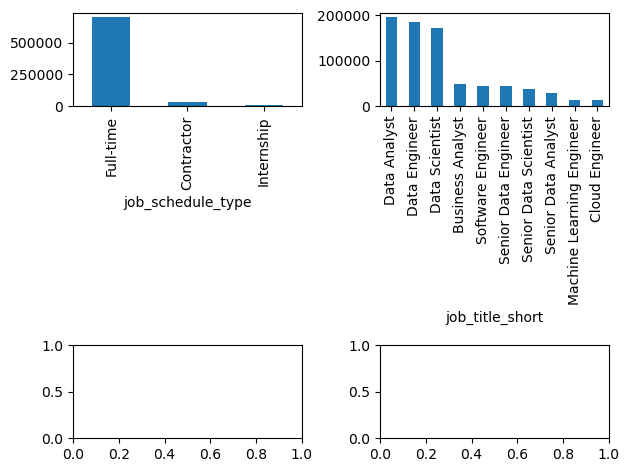

In [ ]:
fig,ax=plt.subplots(2,2)
df['job_title_short'].value_counts().plot(kind='bar',ax=ax[0,1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[0,0])
fig.tight_layout()


In [ ]:
df_skills=df.copy()
df_skills=df_skills.explode('job_skills')
skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

In [ ]:
job_titles=['Data Analyst','Data Scientist','Data Engineer']

In [ ]:
for i,job_title in enumerate(job_titles):
    print(i,job_title)

0 Data Analyst
1 Data Scientist
2 Data Engineer


In [ ]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


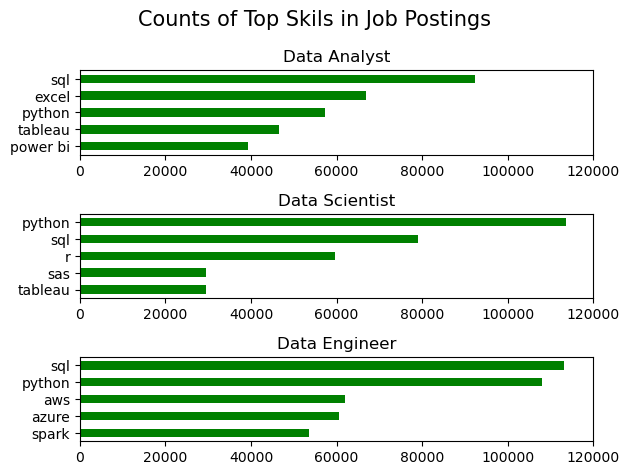

In [ ]:
fig,ax=plt.subplots(3,1)
for i,job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head()
    df_plot.plot(kind='barh',
                 color='green',
                 x='job_skills',
                 y='skill_count',
                 ax=ax[i],title=job_title
                 ).invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)
    fig.tight_layout()
    fig.suptitle('Counts of Top Skils in Job Postings',fontsize=15)

In [ ]:
#https://www.youtube.com/watch?v=wUSDVGivd-8
#8h30m